<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


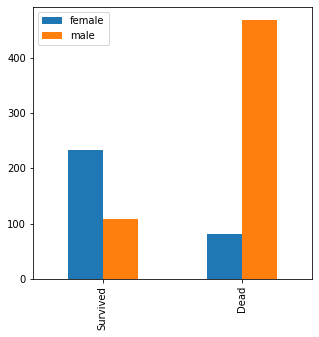

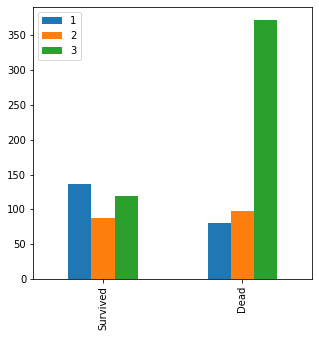

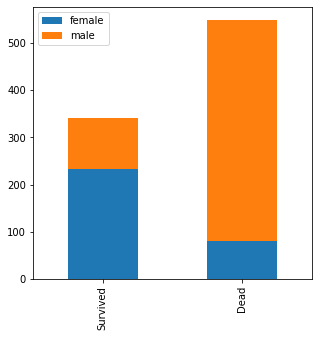

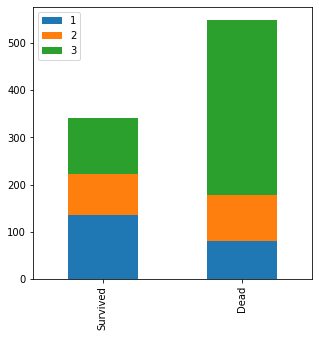

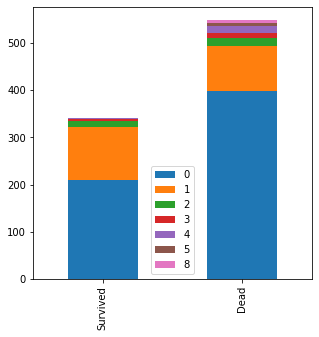

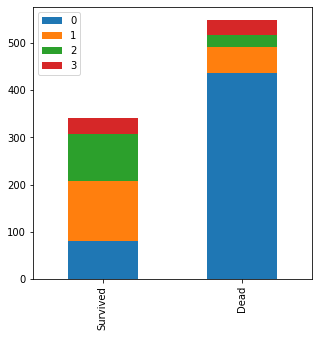

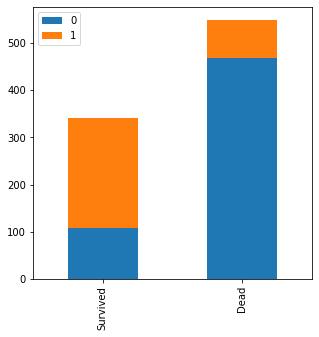

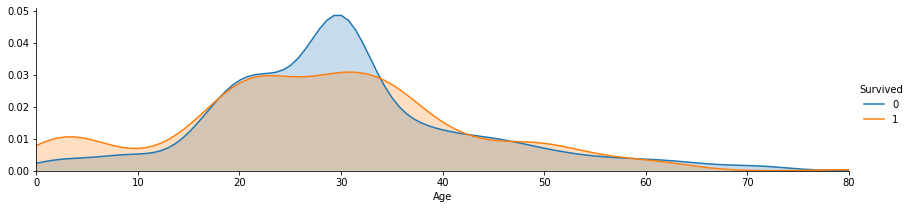

dataset =       PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0              1         0       3    0  22.0      1      0         A/5 21171   
1              2         1       1    1  38.0      1      0          PC 17599   
2              3         1       3    1  26.0      0      0  STON/O2. 3101282   
3              4         1       1    1  35.0      1      0            113803   
4              5         0       3    0  35.0      0      0            373450   
..           ...       ...     ...  ...   ...    ...    ...               ...   
886          887         0       2    0  27.0      0      0            211536   
887          888         1       1    1  19.0      0      0            112053   
888          889         0       3    1  21.0      1      2        W./C. 6607   
889          890         1       1    0  26.0      0      0            111369   
890          891         0       3    0  32.0      0      0            370376   

        Fare Cab

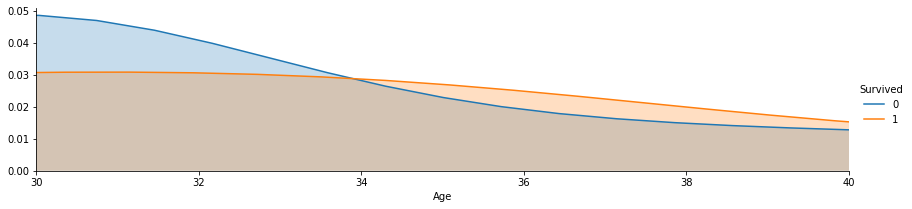

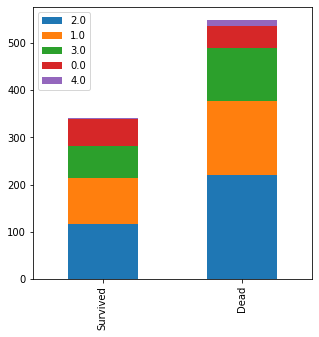

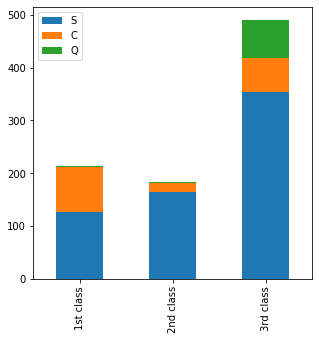

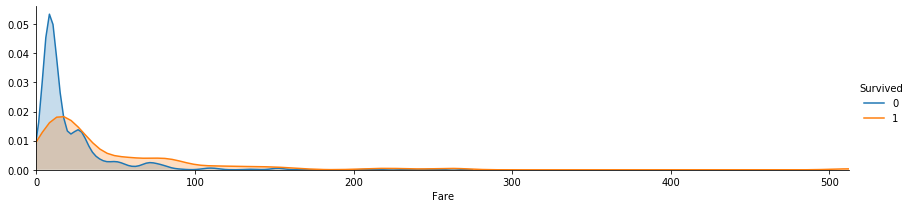

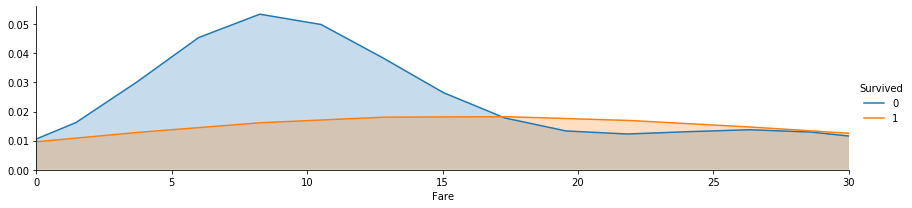

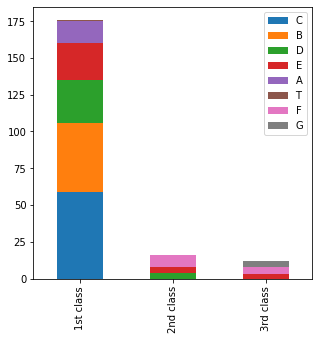

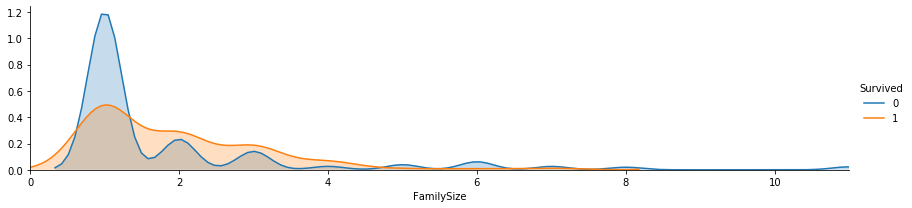

In [7]:
import pandas as pd
import numpy as np
pd.__version__

# 데이터 불러오기

train=pd.read_csv('c:/mina/data/titanic_train.csv', delimiter=',')
test=pd.read_csv('c:/mina/data/titanic_test.csv', delimiter=',')

# 데이터 확인

train.shape
test.shape
train.head()
test.head()
train.columns

# 데이터 수집 및 확인

train.head()
# 컬럼 데이터 유형 확인
train.info()

# age는 결측치 (714/891)가 있다.
# Cabin도 결측치(204/891)
# Embarked 결측치(889/891)
# 결측치(null)값 확인
# train.isnull().sum()

train.isnull().sum()

# 시각화를 통한 데이터 분석
# matplotlib, seaborn 로드

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.__version__
# Categorical Features 찾아서 그래프 그리기
# 성별/생존 유무의 인원수를 막대그래프로

train[train['Survived']==1]['Sex']
train[train['Survived']==1]['Sex'].value_counts()
survived = train[train['Survived']==1]['Sex'].value_counts()
dead = train[train['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived,dead])
df.index=['Survived','Dead'];df
df.plot(kind='bar', stacked=False, figsize=(5,5))

# Pclass 생존유무 bar그래프
survived2=train[train['Survived']==1]['Pclass'].value_counts()
dead2=train[train['Survived']==0]['Pclass'].value_counts()
df2=pd.DataFrame([survived2,dead2])
df2.index=['Survived','Dead'];df2
df2.plot(kind='bar', stacked=False, figsize=(5,5))

#SibSp의 생존 유무 함수 만들어 Bar 그래프 그리기 
#bar_chart 함수를 만들어서 변수를 "SibSp'입력받아 그래프 그리기 bar_chart('SibSp')

def bar_chart(value):
    survived3=train[train['Survived']==1][value].value_counts()
    dead3=train[train['Survived']==0][value].value_counts()
    df3=pd.DataFrame([survived3,dead3])
    df3.index=['Survived','Dead'];df3
    df3.plot(kind='bar', stacked=True, figsize=(5,5))
    plt.show()
bar_chart("Sex")
bar_chart("Pclass")
bar_chart("SibSp")

# 피쳐 엔지니어링(Feature engineering)

# 1) Name 컬럼 변경하기
#    : Name 값 중 '.'이전의 문자열을 추출하면 구분이 될까?

train_test_data=[train,test]
for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

train.head(3)

# 2) 가져온 타이틀을 숫자로 바꾸기

train['Title'].value_counts()

# 실습) Title 컬럼의 데이터를
#'Mr'=0, "Minss"=1, "Mrs"=2 -"Master","Dr","Rev","Col","Major","Mlle","countess"=3 -"Ms", "Lady", "Jonkheer", "Don","Mme","Capt","sir"=3

# 앞의 데이터를 미리 다른 곳에 저장해두기

train_bk=train[:]
test_bk=test.copy()

title_mapping={"Mr": 0, "Miss" : 1, "Mrs" : 2,
               "Master" : 3, "Dr" : 3, "Rev" : 3,
               "Col" : 3, "Major" : 3, "Mlle" : 3,
               "Countess" : 3, "Ms" : 3, "Lady" : 3,
               "Jonkheer" : 3, "Don" : 3,
               "Mme" : 3, "Capt" : 3, "Sir" : 3}

for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_mapping)
    
train.head(3)


train_bk01=train[:]
test_bk01=test.copy()

train_test_data=[train,test]
for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
train.head(3)    

title_mapping={"Mr": 0, "Miss" : 1, "Mrs" : 2,
               "Master" : 3, "Dr" : 3, "Rev" : 3,
               "Col" : 3, "Major" : 3, "Mlle" : 3,
               "Countess" : 3, "Ms" : 3, "Lady" : 3,
               "Jonkheer" : 3, "Don" : 3,
               "Mme" : 3, "Capt" : 3, "Sir" : 3}

for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_mapping)
    
train.head(3)

# Title 칼럼 
train_bk02=train[:]
test_bk02=test.copy()

# Title 컬럼별 / 생존 유 무 별 생존자 수 bar 그래프 그리기

bar_chart('Title')

train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

# Name 컬럼 삭제후
train_bk03=train[:]
test_bk03=test.copy()

train['Sex']
sex_mapping={"male":0,"female":1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)
bar_chart('Sex')

#성별칼럼 변경 후
train_bk04=train[:]
test_bk04=test.copy()

train["Age"].fillna(train.groupby("Title")["Age"]. transform("median"),
                    inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"]. transform("median"),
                    inplace=True)


# 나이 결측치 fillna 이후
train_bk05=train[:]
test_bk05=test.copy()

facet=sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

# sns.FacetGrid
# sns.kdeplot

facet=sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age',shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.xlim(30,40)
#0~20, 20~30, 30~40, 40~60

# Age 16세 이하=0
# 16세보다 크고 26세보다 작으면 = 1
# 26세보다 크고 36세보다 작으면 = 2
# 36세보다 크고 62세보다 작으면 = 3
# 62세보다 크면 4

for dataset in train_test_data:
    print("dataset = ", dataset)
    break

for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <=16, 'Age']=0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <=26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <=36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <=62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age']=4
    
bar_chart('Age')

# 좌석 등급별로 어느 출항지에서 탔는지

Pclass1=train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2=train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3=train[train['Pclass']==3]['Embarked'].value_counts()
df=pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index=['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(5,5))

train['Embarked'].isnull().sum()


for dataset in train_test_data:
    # dataset['Embarked']=dataset['Embarked'].fillna('S')
    dataset['Embarked'].fillna('S', inplace=True)
    
train['Embarked'].isnull().sum()

embark_mapping={"S":0,"C":1,"Q":2}
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(embark_mapping)
    
# Fare:Fare 결측치 확인 : 결측치는 Pclass별, 요금별, median 값으로 변경
# Fare별 생존별 Kdeplot을 그리기


test["Fare"].fillna(test.groupby("Pclass")["Fare"]. transform("median"),
                    inplace=True)

facet=sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare',shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

#0~20, 0~30, 

facet=sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare',shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,30)

plt.show()

for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <=17, 'Fare']=0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <=30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <=100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare']=3
    
# Cabin 전처리:   
# Cabin 데이터 유형 확인( value_counts)
# Cabin 에서 앞에 1자리만 추출해서 변경하기
# Pclass별/ Cabin 분포 확인(value_counts) 후 Bar 그래프
# "A":0, b(0.4), C:0.8, D:1.2, E:1.6, F:2, G:2.4, T:2.8
# 결측치는 Pclass별 Cabin별 중앙값으로 대체 

train.head(2)

# train.'Cabin'.value_counts()
train['Cabin'].value_counts()


for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].str[:1]
train.head(2)

Pclass1=train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2=train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3=train[train['Pclass']==3]['Cabin'].value_counts()
df=pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index=['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(5,5))

cabin_mapping={"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2.0,"G":2.4,"T":2.8}
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)
    
    
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"]. transform("median"),
                    inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"]. transform("median"),
                    inplace=True)
train.head(20)
train['Cabin'].isnull().sum()

# SibSp, Parch 전처리:
#F amilySize= SibSp+Parch+1
# kdeplot.FamilySize 그래프 그리기 -1(0), 2(0.4),3(0.8).....11(4)

for dataset in train_test_data:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1
    
train.head(10)

facet=sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'FamilySize',shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)
plt.show()

train["FamilySize"].value_counts()

family_mapping={1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2.0,7:2.4,8:2.8,9:3.2,10:3.6,11:4}
for dataset in train_test_data:
    dataset['FamilySize']=dataset['FamilySize'].map(family_mapping)
    
train.head(10)

# Ticket, SibSp, Parch, PassengerId컬럼 삭제: -train , test

for dataset in train_test_data:
    dataset.drop(['PassengerId','Ticket','SibSp','Parch'], axis=1, inplace=True)
    
train.head(2)

#완료 후 excel로 저장하기.
train.to_excel("titanic_train_EDA.xlsx")
test.to_excel("titanic_test.EDA.xlsx")